# Project Description

#### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins

#Columns Names and their easy to understand names
##W.  :     Wins --- This is our Output feature
##R.  :     Runs
##AB. :    At Bats
##H.  :     Hits
##2B. :    Doubles
##3B. :    Triples
##HR. :    Homeruns
##BB. :    Walks
##SO. :    Strikeouts
##SB  :    Stolen Bases
##RA  :    Runs Allowed
##ER  :    Earned Runs
##ERA :   Earned Run Average
##CG  :    Complete Games
##SHO :   Shutouts
##SV. :    Saves
##E.  :     Errors


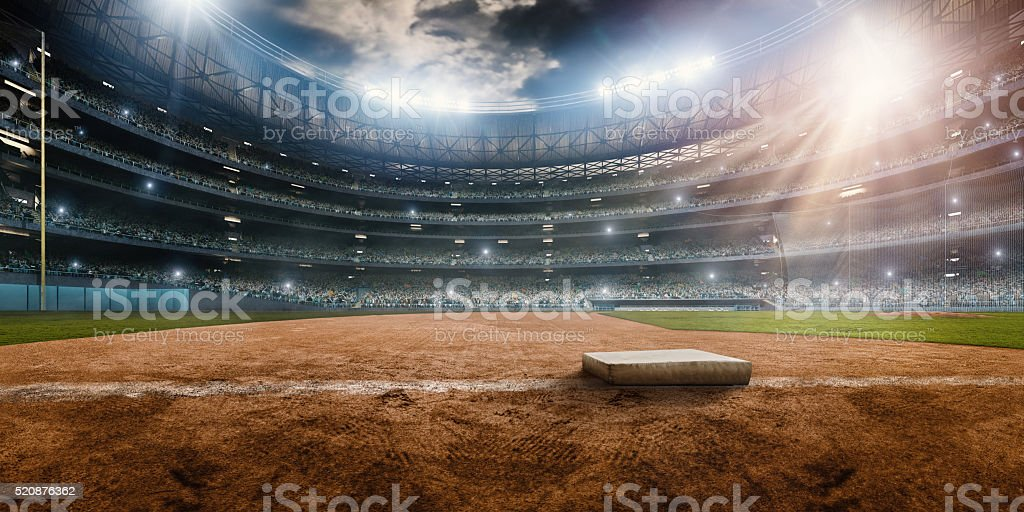

Let's First Import Required Libraries and Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import  zscore
from sklearn.preprocessing import power_transform         #to remove skewness
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split      #for data preprocessing
from sklearn.linear_model import LinearRegression, Ridge   #For model training
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score #For r2 score
from sklearn import metrics

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

As we can see that our data has total of 17 columns and 30 rows.

Now, lets check for null values. If we got any, we will remove the row so that the null values does not impact our model.

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We dont have any null values. That means our data is clean. we can now proceed further

Now we will check some basic info about our data like, mean, median, average etc

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Out of 17 columns we had, only ERA is float , rest are all integars

Now we will visualize every column with win column to check which column is correlated with win and which one is positively correlated and negatively related and will also check outliers

In [9]:
corelation_matrix = df.corr()

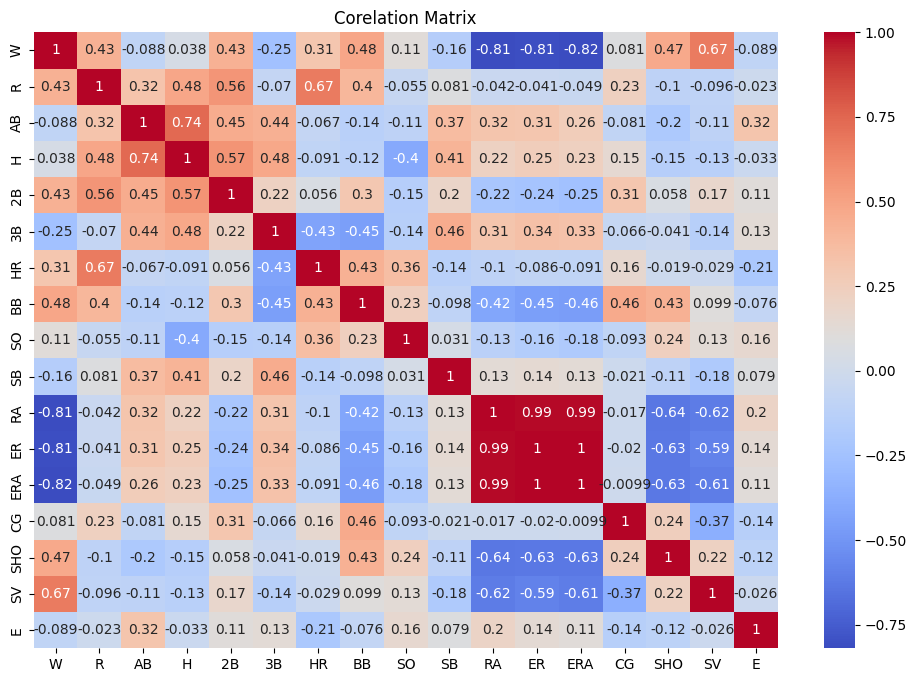

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm')
plt.title('Corelation Matrix')
plt.show()

By Looking at the heatmap, we can safely say that:

'Saves' column has the highest correlation (67%) with the target column, which can be considered as strong bond.

'Walks' column has 48% correlation with the target column, which can be considered as strong bond.

'Shutouts' column has 47% correlation with the target column, which can be considerd as strong bond.

'Earned Run Average (ERA)' has the lowest correlation -82% with the target column, which can be considered as very weak bond.

'Earned Runs' has -81% correlation with the target column which can be considered as very weak bond.

'Runs Allowed' has -81% correlation with the target column which can be considered as very weak bond.

Now, lets plot scatter plots to examine relation between each column with Win column.

In [11]:
all_columns = ['E', 'SV', 'SHO', 'CG', 'ERA', 'ER', 'RA', 'SB', 'SO', 'BB', 'HR', '3B', '2B', 'H', 'AB', 'R']

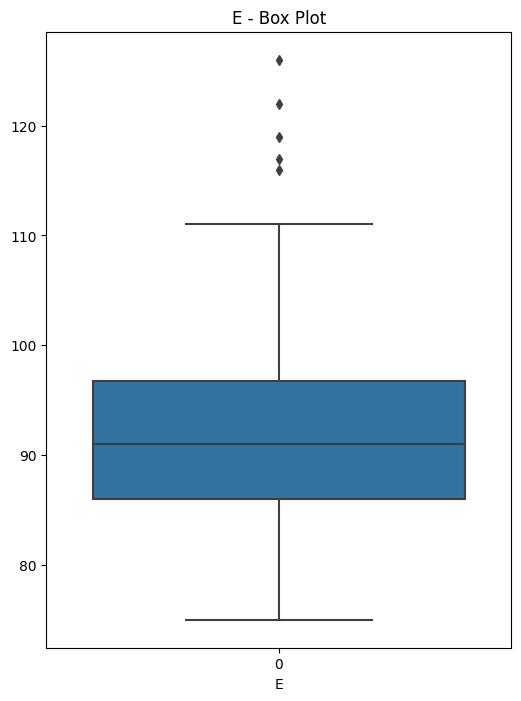

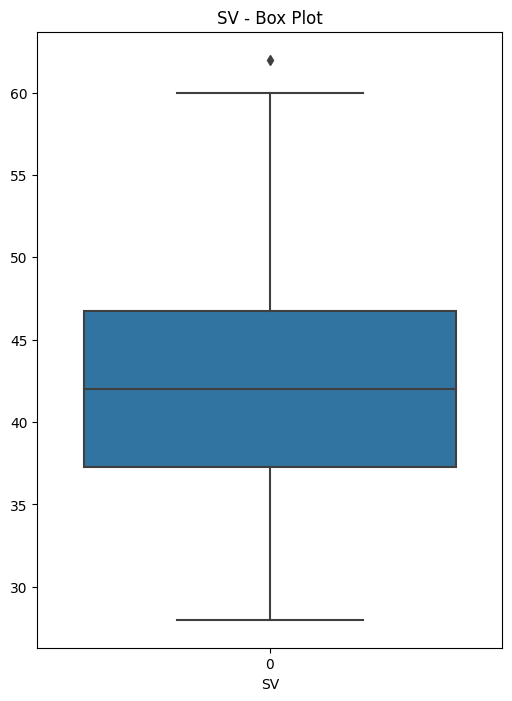

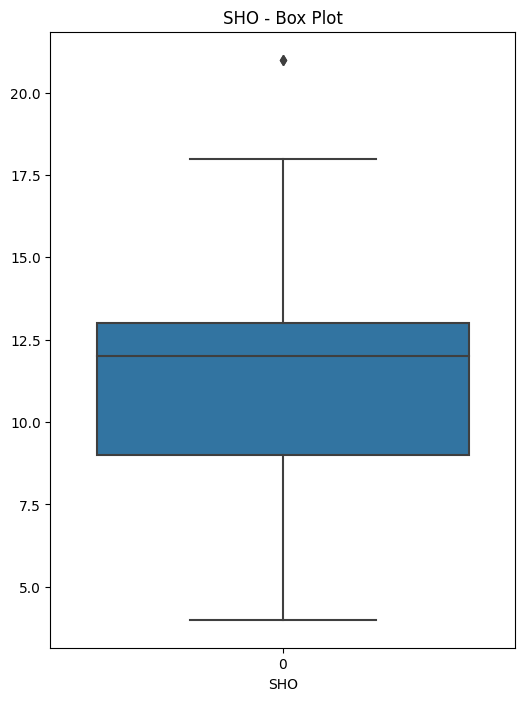

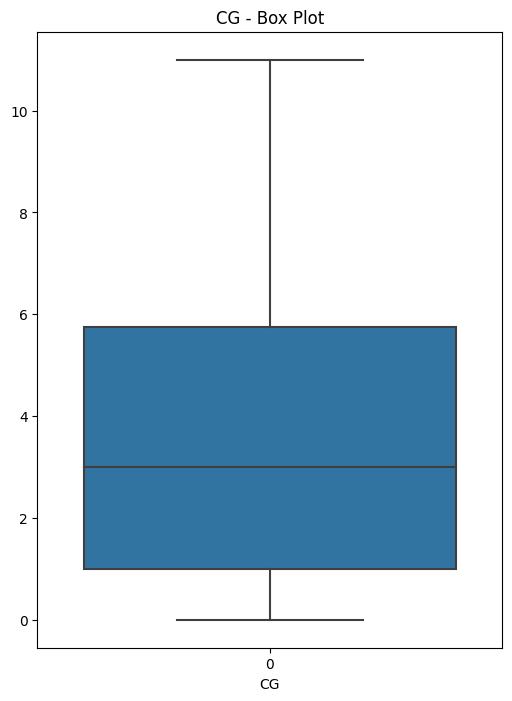

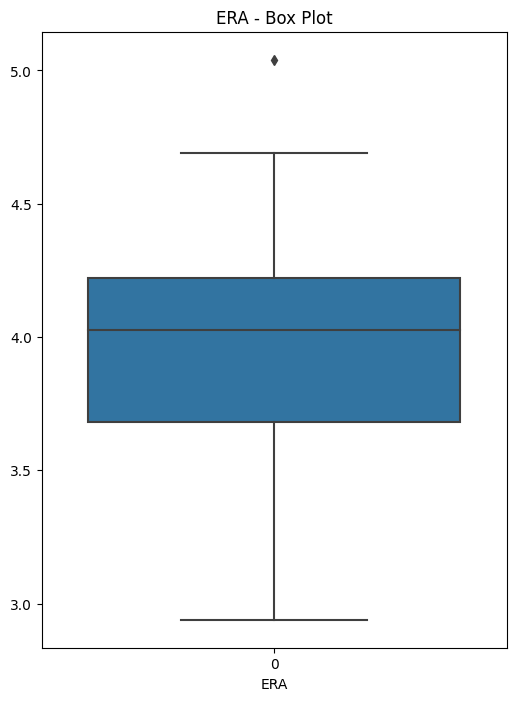

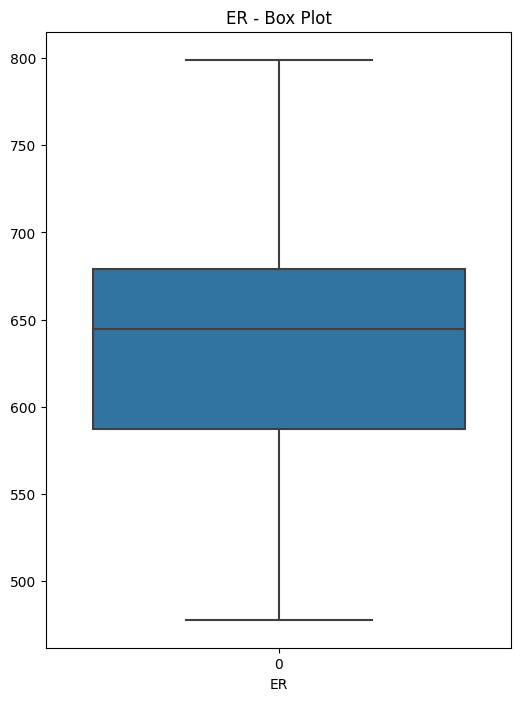

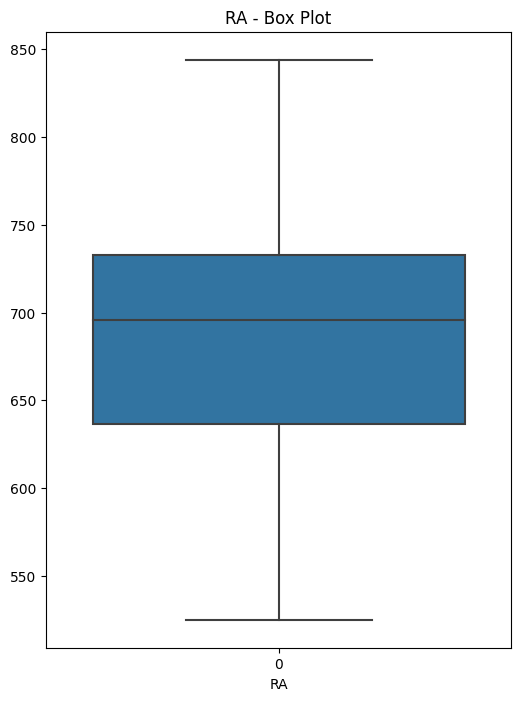

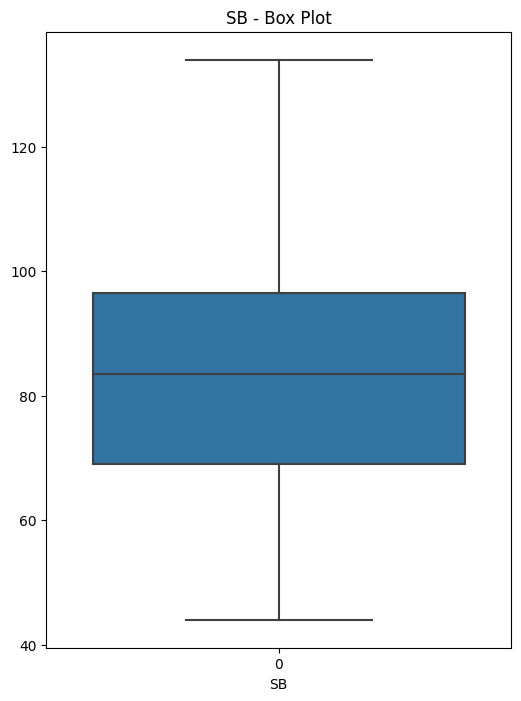

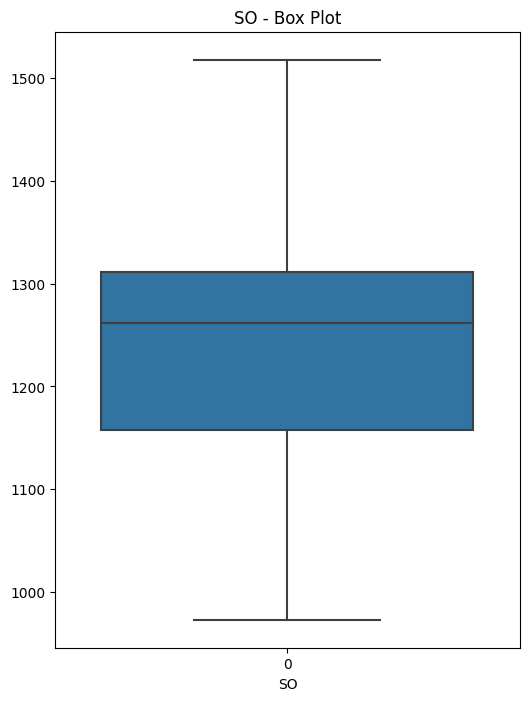

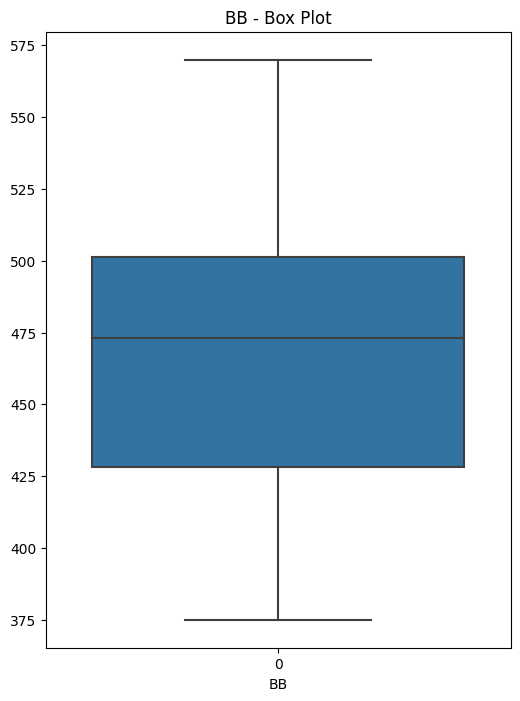

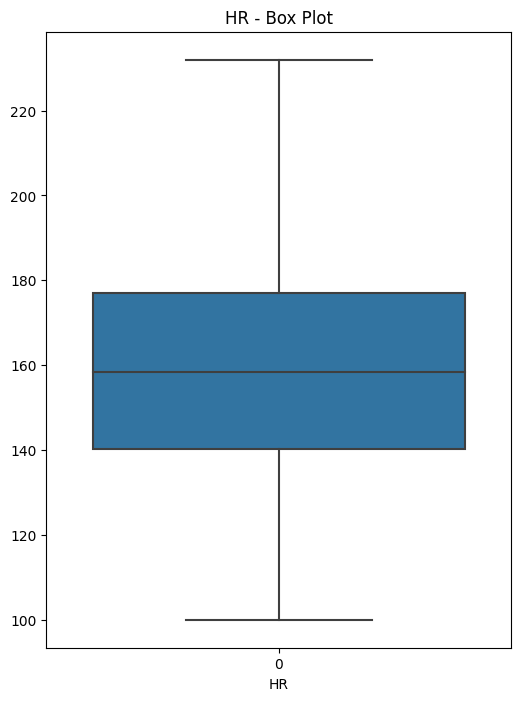

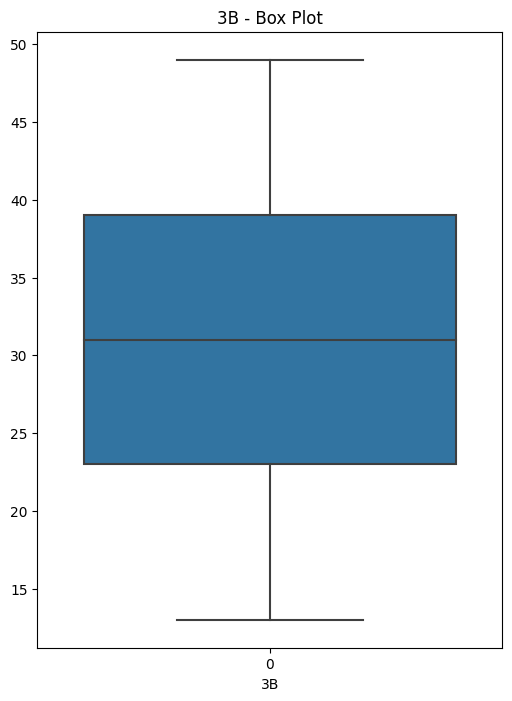

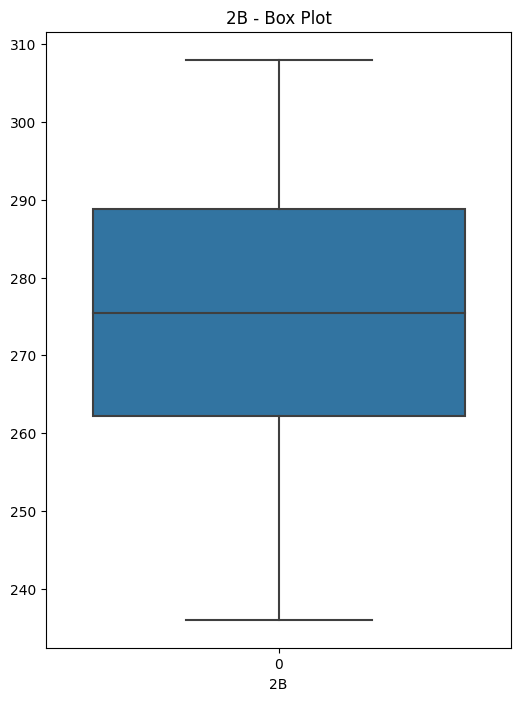

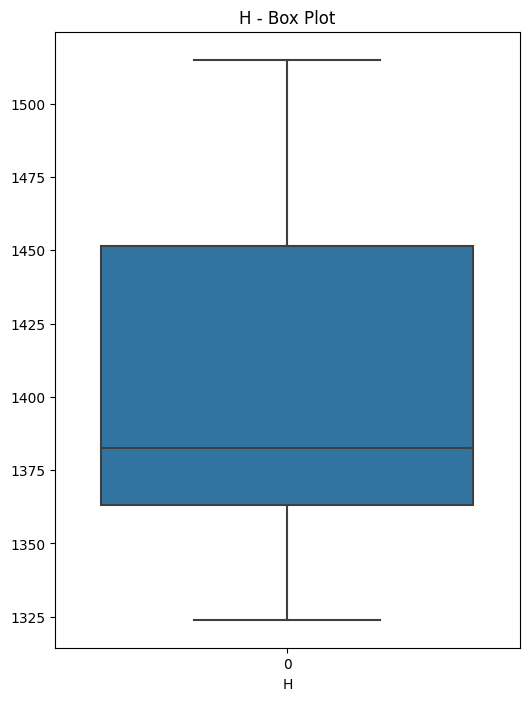

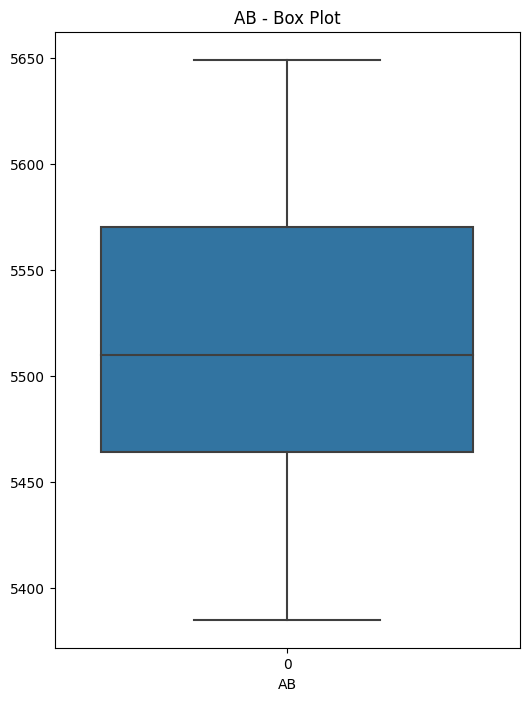

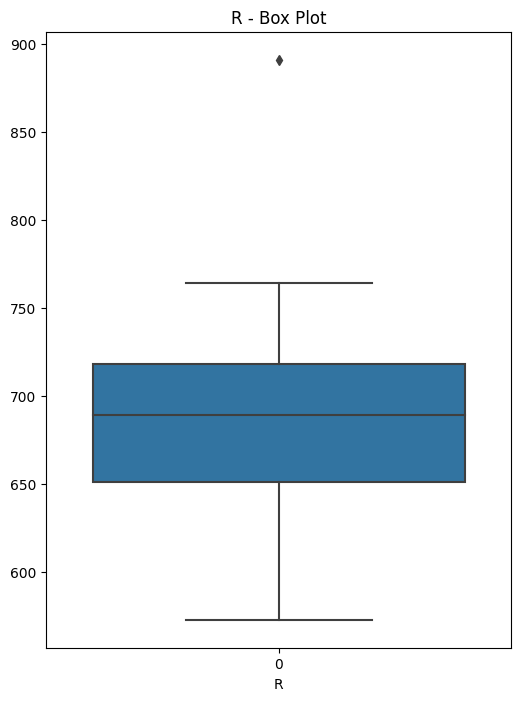

In [12]:
for column in all_columns:
  plt.figure(figsize=(6,8))
  sns.boxplot(data=df[column])
  plt.title(f'{column} - Box Plot')
  plt.xlabel(column)
  plt.show()

According to our BoxPlot, we can say that :     

Dataset contains very few outliers

Columns which contain Outliers are : SV (Saves), E (Errors), SHO (Shutouts), ERA (Earned Run Average), R (Runs)

Rest all columns does not have any outliers.

*Lets Check for Skewness*

In [5]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Renaming our columns will be helpful for us for better and quick understanding of the overall model and data.

In [6]:
df = df.rename(columns={'W':'Wins', 'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns',
                   'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs',
                   'ERA':'Earned Run Average', 'CG':'Complete Games', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})

df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [7]:
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

Lets check for skewness again

In [8]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

After checking the skewness, Some of the columns which have normal distribution of data (skew between -0.5 & +0.5) are :     
Strikeouts,
At Bats,
Doubles,
Triples,
Walks,
Strikeouts,
Stolen Bases,
Runs Allowed,
Earned Runs,
Earned Run Average

Columns which are skewed :    
Runs ,
Hits,
Homeruns,
Complete Games,
Shutouts,
Saves,
Errors

In [13]:
# Removing Outliers using z-score
z = np.abs(zscore(df)) #Compute the z score of each value in the sample, relative to the sample mean and standard deviation.
z.shape

(30, 17)

In [14]:
#Lets put our cutoff_value = 3 for zscore (Values greater than +3 or less than -3 will be considered as outliers)
cutoff_value = 3

In [15]:
print(np.where(z>3))

(array([5]), array([1]))


In [17]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(29, 17)

Dividning our data into feature and vector

In [18]:
x = df_new.drop(['Wins'], axis = 1)
y = df_new['Wins']

In [20]:
# Using Power Transform to remove skewness
x = power_transform(x)

In [21]:
x

array([[ 9.62543504e-01,  8.41297206e-01,  4.16333634e-16,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01, -6.92832993e-01, -2.49800181e-16,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01, -1.11038859e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  2.59812372e

In [23]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 9.62543504e-01,  8.42150448e-01,  1.65963137e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01, -6.91979750e-01, -9.59650790e-01,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01, -1.10953535e+00,  2.25800186e-02,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  2.60665615e

Data PreProcessing

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


We will train our model now

## RANDOM FOREST REGRESSOR

In [41]:
# Random Forest Regressor
random_forest = RandomForestRegressor(max_depth=2, random_state=0)
random_forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [42]:
# Predict new output
random_forest_pred = random_forest.predict(x_test)
random_forest_pred

array([77.11478453, 89.54455803, 77.08053153, 75.71951818, 74.91132121,
       75.59207374])

## LINEAR REGRESSION

In [43]:
linear_regression = LinearRegression(fit_intercept = True)
linear_regression.fit(x_train, y_train)
print("Coef :", linear_regression.coef_)
print("Intercept :", linear_regression.intercept_)

Coef : [  3.89402387  -4.62338913   2.69414444  -0.05971867   1.18524141
   0.51733115  -1.92488945  -0.88286383  -1.95905682   5.06685941
  44.24898831 -56.87292962   0.85367226  -0.55188477   2.06014032
  -0.51537834]
Intercept : 80.01279434296544


In [44]:
# Predict new output
lr_pred = linear_regression.predict(x_test)
lr_pred

array([75.74372743, 84.87525504, 78.57614739, 63.11147034, 80.40279294,
       81.66164279])

## K NEIGHBORS

In [45]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [46]:
# Predicting the new result

knn_pred = KNN.predict(x_test)
knn_pred

array([75.5, 84.5, 79.5, 80.5, 76.5, 77.5])

## R-SQUARED

In [48]:
print("R2 Score for Linear Regression :", r2_score(y_test, lr_pred))
print("R2 Score for KNN :", r2_score(y_test, knn_pred))
print("R2 Score for Random Forest :", r2_score(y_test, random_forest_pred))

R2 Score for Linear Regression : 0.6232605365719017
R2 Score for KNN : 0.19463667820069208
R2 Score for Random Forest : 0.47062350487381754


R2 for LR is closest to 1, so this is our best model for this case study

Final Conclusion

In [49]:
# Lets Check difference between precited and original values
a = np.array(y_test)
predicted = np.array(linear_regression.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,74,75.743727
1,97,84.875255
2,76,78.576147
3,67,63.111470
4,78,80.402793
5,88,81.661643
